<div class="alert alert-danger">

<h1>Take notice!</h1>
<ul>
    <li>This class will be recorded</li>
</ul>
    
</div>

# An Open Data case study:  Hot-spots for Arrests in LA over time


## What is an API?

Some examples:

Mapping API's

- [Google Maps API](https://developers.google.com/maps/documentation/javascript/overview#maps_map_simple-javascript)
- [Leaflet](https://leafletjs.com/)
- [Mapbox](https://docs.mapbox.com/mapbox-gl-js/example/)

Data API's
- [Twitter API](https://developer.twitter.com/en)
- [Metro API](https://developer.metro.net/api/)
- [Census API](https://www.census.gov/data/developers/guidance/api-user-guide.Example_API_Queries.html)


# Part 1: Mini project and code review: Mapping gun violence

As humans, we are troubled by recent events related to police brutality and gun violence. As planners, we are equipped with tools to do something about it. A quick scan reveals that open data exists on these issues, and one such source can be found with the Washington Post.

- https://github.com/washingtonpost/data-police-shootings

When you find a csv file posted in the GitHub account that is trustworthy, you can directly access it and pull the data into a Jupyter notebook (you may use this method to access your own csv data for example). However, you must first click on the "View raw" link and use **that** URL.

<img src="images/git%20view%20raw.png" width=600>

Next, copy the URL that produces the raw view of the data.

<img src="images/git raw url.png" width="600">

Now we can investigate and see if this data is usable within our Jupyter interface. Let's begin by importing some libraries.

In [1]:
# libraries
import pandas as pd
import geopandas as gpd

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

import contextily as ctx

Hey? What is `contextily`? Yes, it's a new library we are using that allows us to choose a basemap to put our data on top of. We'll learn more about this as we move along.

- https://github.com/darribas/contextily

In [2]:
# import the data into a new variable
df = pd.read_csv("https://raw.githubusercontent.com/washingtonpost/data-police-shootings/master/v2/fatal-police-shootings-data.csv")

In [3]:
# check the data, specifically for the latitude and longitude columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9319 entries, 0 to 9318
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          9319 non-null   int64  
 1   date                        9319 non-null   object 
 2   threat_type                 9246 non-null   object 
 3   flee_status                 8035 non-null   object 
 4   armed_with                  9104 non-null   object 
 5   city                        9246 non-null   object 
 6   county                      4505 non-null   object 
 7   state                       9319 non-null   object 
 8   latitude                    8274 non-null   float64
 9   longitude                   8274 non-null   float64
 10  location_precision          8274 non-null   object 
 11  name                        8840 non-null   object 
 12  age                         8792 non-null   float64
 13  gender                      9286 

### From dataframe (df) to geodataframe (gdf)
Whenever you bring data into a jupyter notebook that is in a `json` or `csv` format, *if* the data contains separate columns for latitude and longitude, you can convert the data into a geodataframe for mapping purposes.

Things to note: If the data has latitude and longitude coordinates, it is a **[geographic coordinate system (GCS)](https://en.wikipedia.org/wiki/World_Geodetic_System)** with a crs code `epsg:4326`.

In [4]:
# convert df to gdf (geodataframe)
# since data is in lat/lon's assign the crs to WGS84 (epsg:4326)
gdf = gpd.GeoDataFrame(df, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(df.longitude, df.latitude))

### What is the projection?

In [5]:
# output the data's projection
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The key output here is `WGS 84` indicating that the data is in geographic

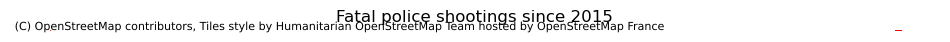

In [6]:
# start the plot
fig, ax = plt.subplots(figsize=(12,12))
#ax = axis, fig size = size of plot
# add the data options
gdf.plot(ax=ax, 
        marker='X',
        markersize=10,
        color='red')

# turn the axes off
ax.axis('off')

# give it a title
ax.set_title('Fatal police shootings since 2015')

# add a basemap
ctx.add_basemap(ax, crs=4326) # note that we must specify the projection here (crs)

In [10]:
# Calculate the bounding box 
bbox = gdf.total_bounds

# Print the bounding box
print("Bounding Box:")
print("min Longitude:", bbox[0])
print("min Latitude:", bbox[1])
print("max Longitude:", bbox[2])
print("max Latitude:", bbox[3])

Bounding Box:
min Longitude: -9007175462532118.0
min Latitude: 19.4975033
max Longitude: -67.8671657
max Latitude: 71.3012553


In [9]:
us = gpd.read_file('data/unitedStates.json')
us.set_crs('epsg:4326')

id                  name    density  \
0   01               Alabama     94.650   
1   02                Alaska      1.264   
2   04               Arizona     57.050   
3   05              Arkansas     56.430   
4   06            California    241.700   
5   08              Colorado     49.330   
6   09           Connecticut    739.100   
7   10              Delaware    464.300   
8   11  District of Columbia  10065.000   
9   12               Florida    353.400   
10  13               Georgia    169.500   
11  15                Hawaii    214.100   
12  16                 Idaho     19.150   
13  17              Illinois    231.500   
14  18               Indiana    181.700   
15  19                  Iowa     54.810   
16  20                Kansas     35.090   
17  21              Kentucky    110.000   
18  22             Louisiana    105.000   
19  23                 Maine     43.040   
20  24              Maryland    596.300   
21  25         Massachusetts    840.200   
22  26              Michigan    173.900   
23  27             Minnesota     67.140   
24  28           Mississippi     63.500   
25  29              Missouri     87.260   
26  30               Montana      6.858   
27  31              Nebraska     23.970   
28  32                Nevada     24.800   
29  33         New Hampshire    147.000   
30  34            New Jersey   1189.000   
31  35            New Mexico     17.160   
32  36              New York    412.300   
33  37        North Carolina    198.200   
34  38          North Dakota      9.916   
35  39                  Ohio    281.900   
36  40              Oklahoma     55.220   
37  41                Oregon     40.330   
38  42          Pennsylvania    284.300   
39  44          Rhode Island   1006.000   
40  45        South Carolina    155.400   
41  46          South Dakota     98.070   
42  47             Tennessee     88.080   
43  48                 Texas     98.070   
44  49                  Utah     34.300   
45  50               Vermont     67.730   
46  51              Virginia    204.500   
47  53            Washington    102.600   
48  54         West Virginia     77.060   
49  55             Wisconsin    105.200   
50  56               Wyoming      5.851   
51  72           Puerto Rico   1082.000   

                                             geometry  
0   POLYGON ((-87.35930 35.00118, -85.60667 34.984...  
1   MULTIPOLYGON (((-131.60202 55.11798, -131.5691...  
2   POLYGON ((-109.04250 37.00026, -109.04798 31.3...  
3   POLYGON ((-94.47384 36.50186, -90.15254 36.496...  
4   POLYGON ((-123.23326 42.00619, -122.37885 42.0...  
5   POLYGON ((-107.91973 41.00391, -105.72895 40.9...  
6   POLYGON ((-73.05353 42.03905, -71.79931 42.022...  
7   POLYGON ((-75.41409 39.80446, -75.50720 39.683...  
8   POLYGON ((-77.03526 38.99387, -76.90929 38.895...  
9   POLYGON ((-85.49714 30.99754, -85.00421 31.003...  
10  POLYGON ((-83.10919 35.00118, -83.32279 34.787...  
11  MULTIPOLYGON (((-155.63484 18.94827, -155.8813...  
12  POLYGON ((-116.04751 49.00024, -116.04751 47.9...  
13  POLYGON ((-90.63998 42.51006, -88.78878 42.493...  
14  POLYGON ((-85.99006 41.75972, -84.80704 41.759...  
15  POLYGON ((-91.36842 43.50139, -91.21506 43.501...  
16  POLYGON ((-101.90605 40.00163, -95.30634 40.00...  
17  POLYGON ((-83.90335 38.76931, -83.67879 38.632...  
18  POLYGON ((-93.60849 33.01853, -91.16577 33.002...  
19  POLYGON ((-70.70392 43.05776, -70.82441 43.128...  
20  MULTIPOLYGON (((-75.99465 37.95325, -76.01655 ...  
21  POLYGON ((-70.91752 42.88797, -70.81894 42.871...  
22  MULTIPOLYGON (((-83.45424 41.73234, -84.80704 ...  
23  POLYGON ((-92.01470 46.70540, -92.09137 46.749...  
24  POLYGON ((-88.47111 34.99570, -88.20274 34.995...  
25  POLYGON ((-91.83396 40.60957, -91.72989 40.615...  
26  POLYGON ((-104.04753 49.00024, -104.04206 47.8...  
27  POLYGON ((-103.32458 43.00299, -101.62673 42.9...  
28  POLYGON ((-117.02788 42.00071, -114.04295 41.9...  
29  POLYGON ((-71.08183 45.30330, -71.03254 

In [11]:
# Calculate the bounding box 
bbox = us.total_bounds

# Print the bounding box
print("Bounding Box:")
print("min Longitude:", bbox[0])
print("min Latitude:", bbox[1])
print("max Longitude:", bbox[2])
print("max Latitude:", bbox[3])

Bounding Box:
min Longitude: -188.90491
min Latitude: 17.929556
max Longitude: -65.626797
max Latitude: 71.351633


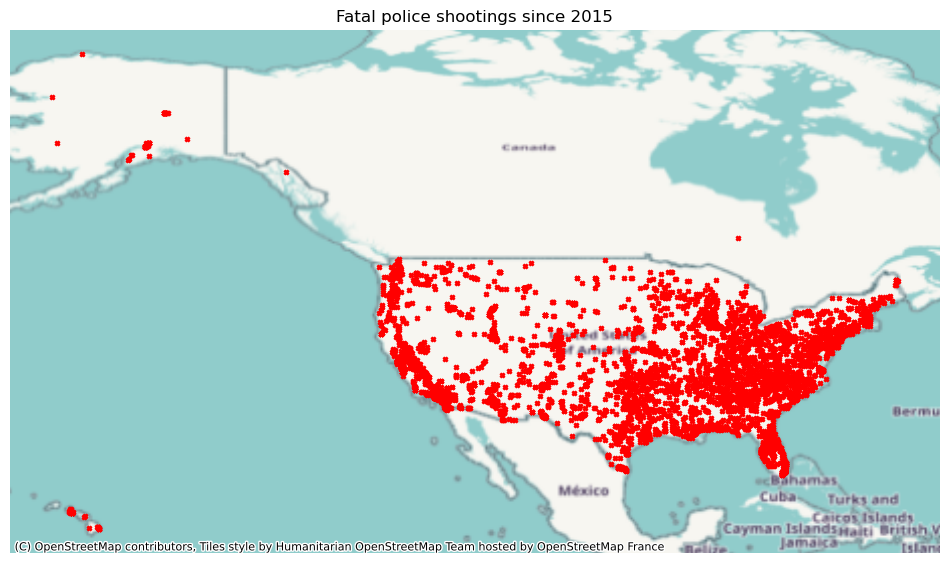

In [14]:
# start the plot
fig, ax = plt.subplots(figsize=(12,12))
#ax = axis, fig size = size of plot
# add the data options

usbounds = [-189,18,-66,71.5]

ax = gdf.clip(usbounds).plot(ax=ax, 
        marker='X',
        markersize=10,
        color='red')

# turn the axes off
ax.axis('off')

# give it a title
ax.set_title('Fatal police shootings since 2015')

# add a basemap
ctx.add_basemap(ax, crs=4326) # note that we must specify the projection here (crs)

Note: You have many `marker` [options](https://matplotlib.org/stable/api/markers_api.html)

Nice. What makes this process **powerful**? And what are potential **pitfalls**?

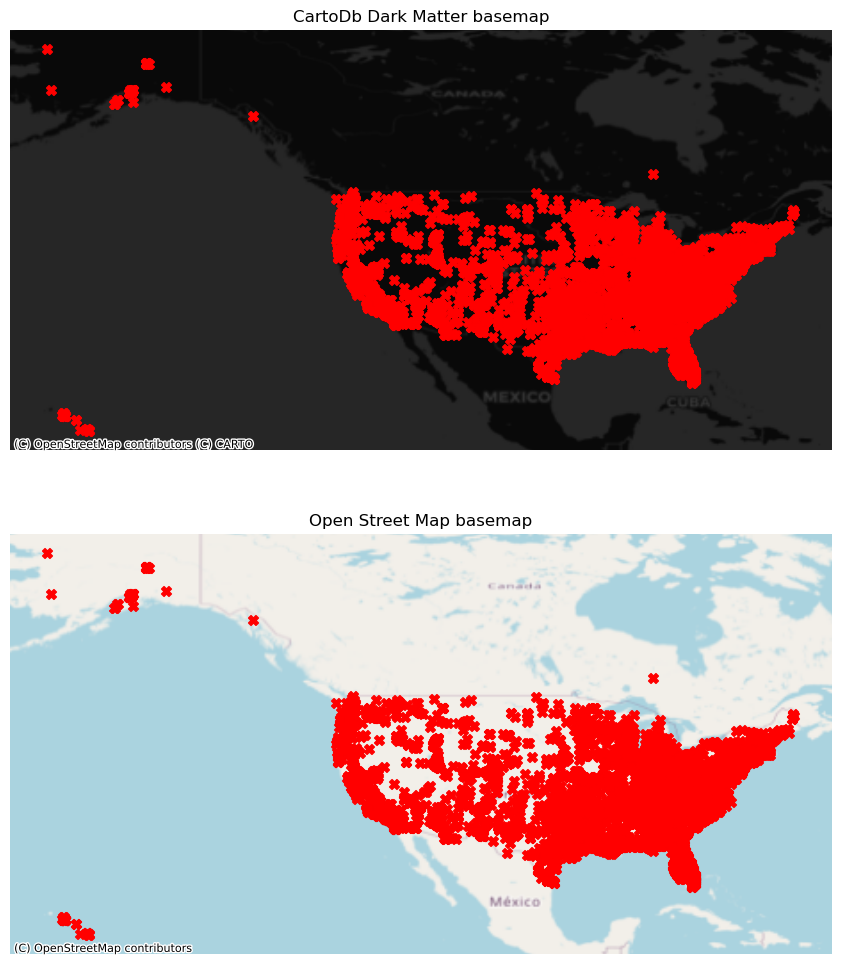

In [18]:
# two maps, different basemaps
fig, ax = plt.subplots(2,1,figsize=(20,12))

# Note that 2 plots were requested, so ax has two items: ax[0] and ax[1]
usbounds = [-188,17,-66,71]

# first map
gdf.clip(usbounds).plot(ax=ax[0], 
                      marker='X',
                      markersize=50,
                      color='red')

ax[0].axis('off')
ax[0].set_title('CartoDb Dark Matter basemap')

ctx.add_basemap(ax[0], source=ctx.providers.CartoDB.DarkMatter,crs=4326)

# second map
gdf.clip(usbounds).plot(ax=ax[1], 
                      marker='X',
                      markersize=50,
                      color='red')

ax[1].axis('off')
ax[1].set_title('Open Street Map basemap')

ctx.add_basemap(ax[1], source=ctx.providers.OpenStreetMap.Mapnik,crs=4326)

### Multiple cities with a for loop

One of the fundamental features of coding is the "for" loop. It allows you to generate multiple outputs with a few lines of code by "looping" through various elements.

- pick cities to map 
- create a list of cities
- loop through each city to generate maps

In [19]:
# create a list of routes
cities = ["Los Angeles","San Francisco", "New York"]

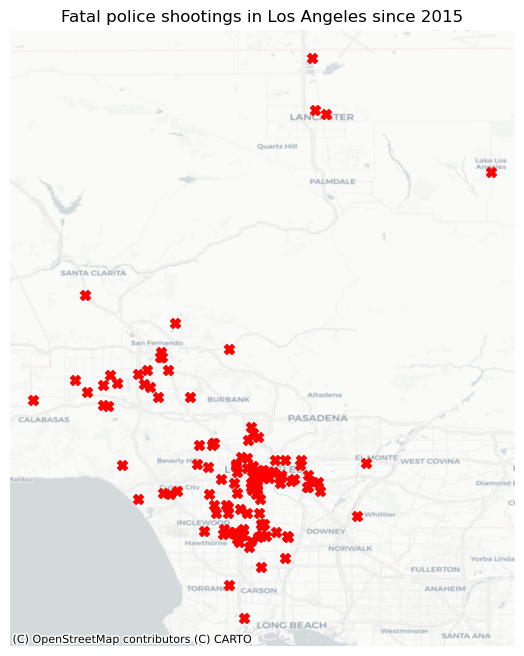

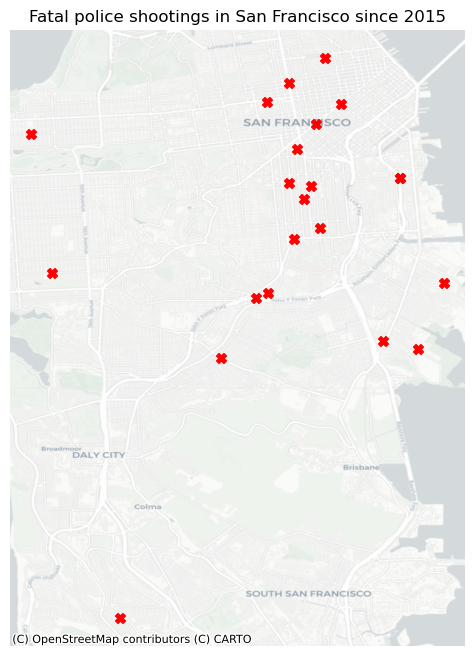

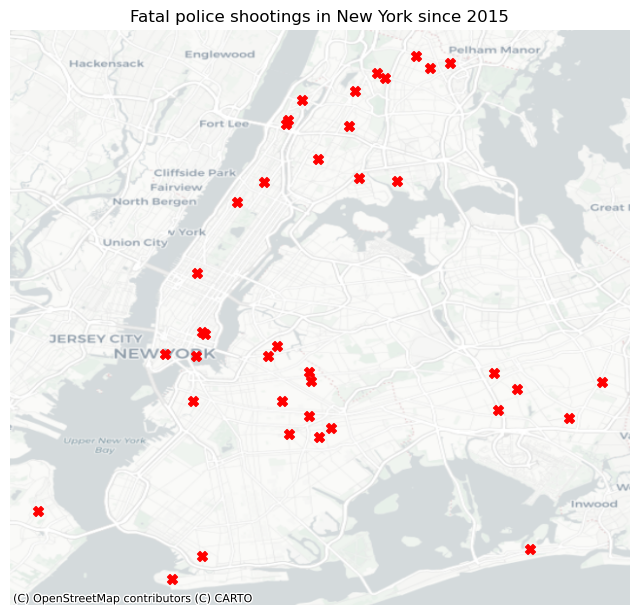

In [22]:
# loop through cities
for city in cities:

    # map it
    fig, ax = plt.subplots(figsize=(8,8))

    # map options: notice the query to filter by individual city
    gdf[gdf.city == city].plot(ax=ax, 
                          marker='X',
                          markersize=50,
                          color='red')

    # no axes
    ax.axis('off')

    # title
    ax.set_title('Fatal police shootings in '+str(city) + ' since 2015')

    #basemap
    ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs=4326)

# Part 2 - Socrata: An open data portal for governments

Many governments use <a href="https://dev.socrata.com/" target="_blank">socrata</a> as their platform to serve data to the public. 
<img src="../images/socrata.png" width=600>

Example: [LA County Open Data Portal](https://data.lacounty.gov/)

<table>
    <tr>
        <td><a href="https://opendata.cityofnewyork.us/" target="_blank"><img src="images/ny.png" width=400></a></td>
        <td><a href="https://datasf.org/opendata/" target="_blank"><img src="images/sf.png" width=400></a></td>
    </tr>
    <tr>
        <td><a href="https://data.cityofchicago.org/" target="_blank"><img src="images/ch.png" width=400></a></td>
        <td><a href="https://data.lacity.org/" target="_blank"><img src="images/la.png" width=400></a></td>
    </tr>
</table>

For this tutorial, we will look at LAPD's arrest data:

https://data.lacity.org/A-Safe-City/Arrest-Data-from-2020-to-Present/amvf-fr72

The <a href="https://dev.socrata.com/docs/endpoints.html" target="_blank">Socrata API</a> allows direct and real-time access to open data.

To access the data, we will use the `sodapy` library: https://github.com/xmunoz/sodapy

Instructions on how to use `sodapy` to access data for this dataset:

<a href="https://data.lacity.org/Public-Safety/Arrest-Data-from-2020-to-Present/amvf-fr72/about_data" target="_blank"><img src="images/ladata1.png"></a>

https://dev.socrata.com/foundry/data.lacity.org/amvf-fr72

### Question:
- What is the difference between exporting the data and using the API?

### It's time to start coding: importing libraries

Let's begin our python journey. First, we identify the libraries we will use, and import them into our project:
- `pandas`
- `plotly express` - [documentation](https://plotly.com/python/plotly-express/)
- `sodapy` - [documentation](https://github.com/xmunoz/sodapy)

*Notice that we will NOT be using geopandas! Don't worry, there will still be very rewarding maps in this session*

In [23]:
# for data wrangling
import pandas as pd

# for interactive plots
import plotly.express as px

# to import open data
from sodapy import Socrata

### Creating a socrata client
Next, we acquire the data using the socrata API. Use the socrata documentation to grab the code syntax for our crime data.
- https://dev.socrata.com/foundry/data.lacity.org/amvf-fr72

In [24]:
# connect to the data portal
client = Socrata("data.lacity.org", None)

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("amvf-fr72", limit=2000)

# Convert to pandas DataFrame
arrests = pd.DataFrame.from_records(results)

# print it with .sample, which gives you random rows
arrests.sample(2)

rpt_id report_type                arst_date  time area    area_desc  \
913  6638516     BOOKING  2023-07-09T00:00:00.000  2201   08      West LA   
149  6595970     BOOKING  2023-04-30T00:00:00.000  1940   12  77th Street   

       rd age sex_cd descent_cd  ... bkg_time bkg_location bkg_loc_cd  \
913  0805  41      M          H  ...     0150      77TH ST       4212   
149  1239  39      F          B  ...     2319      77TH ST       4212   

    :@computed_region_qz3q_ghft :@computed_region_k96s_3jcv  \
913                       24037                         829   
149                       23675                         766   

    :@computed_region_tatf_ua23 :@computed_region_ur2y_g4cx  \
913                         774                         NaN   
149                        1157                           7   

    :@computed_region_kqwf_mjcx :@computed_region_2dna_qi2s   crsst  
913                           6                          81  BELAIR  
149                          13                           2     NaN  

[2 rows x 31 columns]

### Import data based on a query string
That's great! But what if you wanted something specific, like "all arrests in July, 2021?"

In [25]:
# add a "where" statement
results = client.get("amvf-fr72", 
                     limit = 10000, # putting an arbitrary high number (otherwise defaults to 1000)
                     where = "arst_date between '2023-01-01T00:00:00' and '2023-02-01T00:00:00'"
                    )

In [26]:
# Convert to pandas DataFrame
arrests = pd.DataFrame.from_records(results)

### Data Exploration and Analysis

In [27]:
# how many rows and columns?
arrests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4782 entries, 0 to 4781
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   rpt_id           4782 non-null   object
 1   report_type      4782 non-null   object
 2   arst_date        4782 non-null   object
 3   time             4781 non-null   object
 4   area             4782 non-null   object
 5   area_desc        4782 non-null   object
 6   rd               4782 non-null   object
 7   age              4782 non-null   object
 8   sex_cd           4782 non-null   object
 9   descent_cd       4782 non-null   object
 10  chrg_grp_cd      4479 non-null   object
 11  grp_description  4479 non-null   object
 12  arst_typ_cd      4782 non-null   object
 13  charge           4782 non-null   object
 14  chrg_desc        4479 non-null   object
 15  dispo_desc       4405 non-null   object
 16  location         4782 non-null   object
 17  crsst            1888 non-null   

In [29]:
# what fields and datatypes?
arrests.info

<bound method DataFrame.info of          rpt_id report_type                arst_date  time area    area_desc  \
0       6528046     BOOKING  2023-01-01T00:00:00.000  0015   13       Newton   
1       6528349     BOOKING  2023-01-01T00:00:00.000  2115   01      Central   
2       6528200     BOOKING  2023-01-01T00:00:00.000  1230   14      Pacific   
3       6528107     BOOKING  2023-01-01T00:00:00.000  0100   15  N Hollywood   
4       6528091     BOOKING  2023-01-01T00:00:00.000  0355   06    Hollywood   
...         ...         ...                      ...   ...  ...          ...   
4777    6545381     BOOKING  2023-02-01T00:00:00.000  2330   06    Hollywood   
4778    6545307     BOOKING  2023-02-01T00:00:00.000  1830   18    Southeast   
4779    6545373     BOOKING  2023-02-01T00:00:00.000  2130   19      Mission   
4780  232005364         RFC  2023-02-01T00:00:00.000  2230   20      Olympic   
4781  231605274         RFC  2023-02-01T00:00:00.000  1634   16     Foothill   

       

In [28]:
# what are the first 5 rows?
arrests.head()

rpt_id report_type                arst_date  time area    area_desc    rd  \
0  6528046     BOOKING  2023-01-01T00:00:00.000  0015   13       Newton  1317   
1  6528349     BOOKING  2023-01-01T00:00:00.000  2115   01      Central  0161   
2  6528200     BOOKING  2023-01-01T00:00:00.000  1230   14      Pacific  1494   
3  6528107     BOOKING  2023-01-01T00:00:00.000  0100   15  N Hollywood  1562   
4  6528091     BOOKING  2023-01-01T00:00:00.000  0355   06    Hollywood  0646   

  age sex_cd descent_cd  ...                dispo_desc  \
0  39      M          H  ...  DISTRICT ATTORNEY REJECT   
1  20      M          H  ...      CITY ATTORNEY REJECT   
2  43      M          O  ...    FELONY COMPLAINT FILED   
3  36      M          O  ...    FELONY COMPLAINT FILED   
4  21      F          W  ...      CITY ATTORNEY REJECT   

                                   location                            crsst  \
0                                      20TH                          ALAMEDA   
1           11TH                         ST  HOPE                         ST   
2                          400    WORLD WAY                              NaN   
3  12400    MOORPARK                     ST                              NaN   
4           SUNSET                       BL  CAHUENGA                     BL   

       lat        lon                                         location_1  \
0   34.018  -118.2397  {'type': 'Point', 'coordinates': [-118.2397, 3...   
1  34.0483  -118.2631  {'type': 'Point', 'coordinates': [-118.2631, 3...   
2  33.9455     -118.4  {'type': 'Point', 'coordinates': [-118.4, 33.9...   
3  34.1533  -118.4058  {'type': 'Point', 'coordinates': [-118.4058, 3...   
4   34.098  -118.3295  {'type': 'Point', 'coordinates': [-118.3295, 3...   

                  bkg_date bkg_time           bkg_location bkg_loc_cd  
0  2023-01-01T00:00:00.000     0147                77TH ST       4212  
1  2023-01-02T00:00:00.000     0034  METRO - JAIL DIVISION       4273  
2  2023-01-01T00:00:00.000     1401                PACIFIC       4214  
3  2023-01-01T00:00:00.000     0722  METRO - JAIL DIVISION       4273  
4  2023-01-01T00:00:00.000     0443              HOLLYWOOD       4206  

[5 rows x 25 columns]

## Introducting plotly

Now, use plotly express to create a bar chart.

- https://plotly.com/python/bar-charts/

What are the differences between matplotlib and plotly?

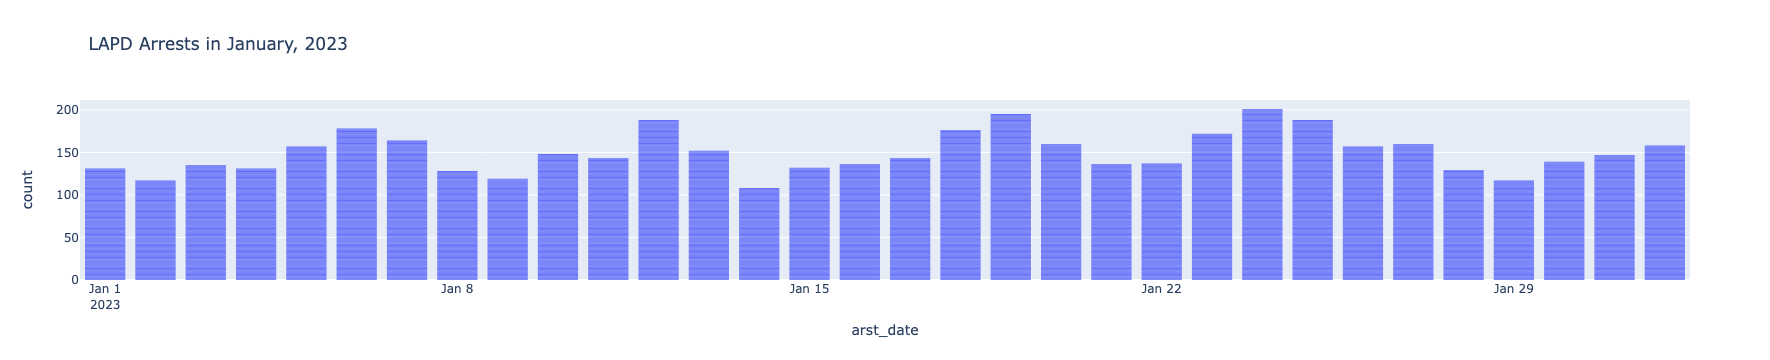

In [30]:
# a simple bar chart, putting date on the x-axis
fig = px.bar(arrests,
       x='arst_date',
       title='LAPD Arrests in January, 2023'
      )

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

### Label axis

In plotly, you can relabel text by providing a dictionary as shown below:

In [ ]:
# add labels by providing a dict
fig = px.bar(
        arrests,
        x='arst_date',
        title='LAPD Arrests in January, 2023',
        labels={
            'arst_date':'Arrest date',
            'count':'Number of arrests'
        }
)

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

Let's dig in further... what if we want to see the distribution of charge types by day?

In [31]:
# show me distinct value of charges
arrests.grp_description.unique().tolist()

['Receive Stolen Property',
 'Narcotic Drug Laws',
 'Aggravated Assault',
 'Driving Under Influence',
 'Robbery',
 'Vehicle Theft',
 'Other Assaults',
 'Larceny',
 'Weapon (carry/poss)',
 'Miscellaneous Other Violations',
 'Forgery/Counterfeit',
 'Burglary',
 'Moving Traffic Violations',
 'Homicide',
 'Sex (except rape/prst)',
 'Against Family/Child',
 nan,
 'Disorderly Conduct',
 'Drunkeness',
 'Fraud/Embezzlement',
 'Prostitution/Allied',
 'Liquor Laws',
 'Rape',
 'Non-Criminal Detention',
 'Disturbing the Peace',
 'Gambling',
 'Federal Offenses']

In [32]:
# show me distinct value of charges
arrest_by_charge = arrests.value_counts('grp_description').reset_index(name='count')
arrest_by_charge

grp_description  count
0               Aggravated Assault    679
1   Miscellaneous Other Violations    596
2                   Other Assaults    518
3          Driving Under Influence    420
4               Narcotic Drug Laws    381
5              Weapon (carry/poss)    356
6                          Larceny    278
7                    Vehicle Theft    218
8                          Robbery    179
9              Prostitution/Allied    148
10                        Burglary    133
11       Moving Traffic Violations    113
12              Disorderly Conduct     85
13            Against Family/Child     72
14          Sex (except rape/prst)     55
15              Fraud/Embezzlement     43
16                        Gambling     39
17                      Drunkeness     32
18                     Liquor Laws     32
19         Receive Stolen Property     31
20                        Homicide     26
21                            Rape     17
22             Forgery/Counterfeit     13
23          Non-Criminal Detention      8
24                Federal Offenses      4
25            Disturbing the Peace      3

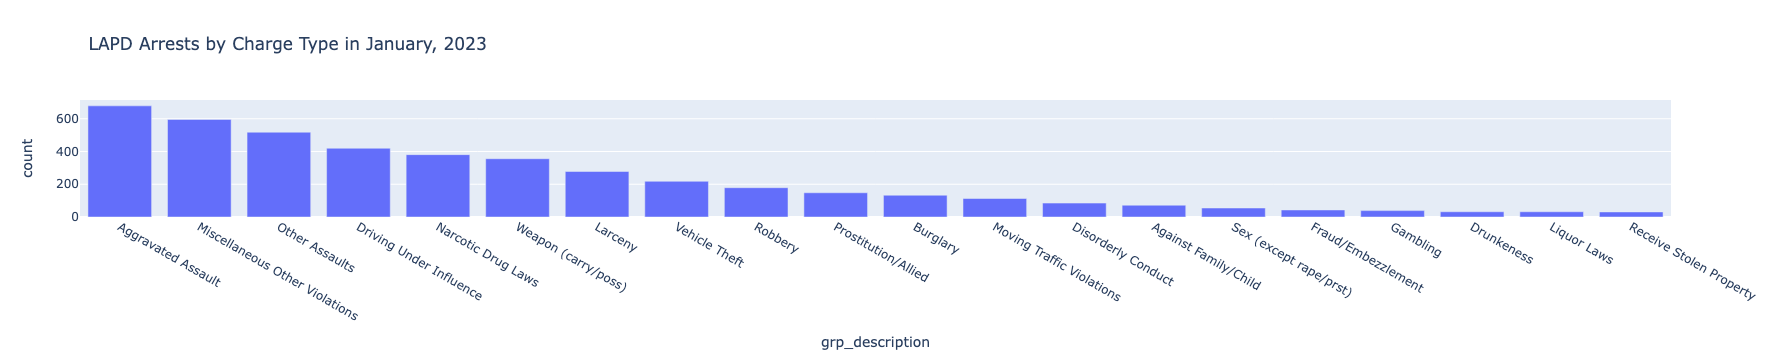

In [33]:
# plot the top 20 charges
fig = px.bar(arrest_by_charge.head(20),
       x='grp_description',
       y='count',
       title='LAPD Arrests by Charge Type in January, 2023')

fig.show()

### Stacked bar charts

What if you wanted to find out the distribution of crime types per day?

In [34]:
arrests_grouped = arrests.value_counts(['arst_date','grp_description']).reset_index(name='count')
arrests_grouped

arst_date                 grp_description  count
0    2023-01-24T00:00:00.000  Miscellaneous Other Violations     32
1    2023-01-25T00:00:00.000             Prostitution/Allied     32
2    2023-01-14T00:00:00.000              Aggravated Assault     30
3    2023-01-12T00:00:00.000  Miscellaneous Other Violations     30
4    2023-01-13T00:00:00.000              Aggravated Assault     28
..                       ...                             ...    ...
556  2023-01-03T00:00:00.000             Prostitution/Allied      1
557  2023-01-22T00:00:00.000         Receive Stolen Property      1
558  2023-01-17T00:00:00.000                      Drunkeness      1
559  2023-01-15T00:00:00.000              Disorderly Conduct      1
560  2023-01-01T00:00:00.000            Against Family/Child      1

[561 rows x 3 columns]

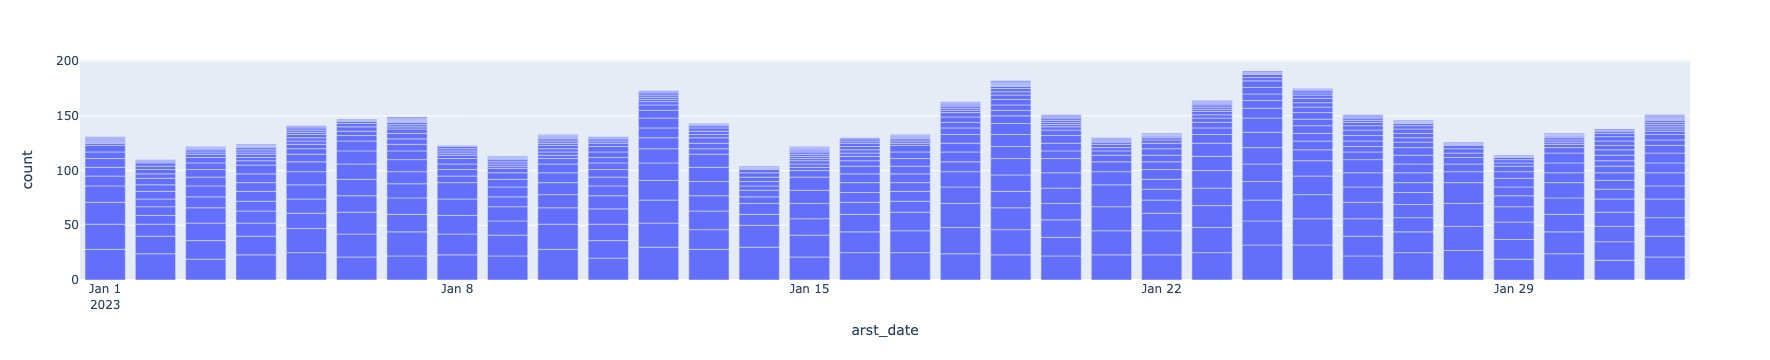

In [41]:
# make a bar chart
fig = px.bar(arrests_grouped,
       x='arst_date',
       y='count'
)

fig.show()

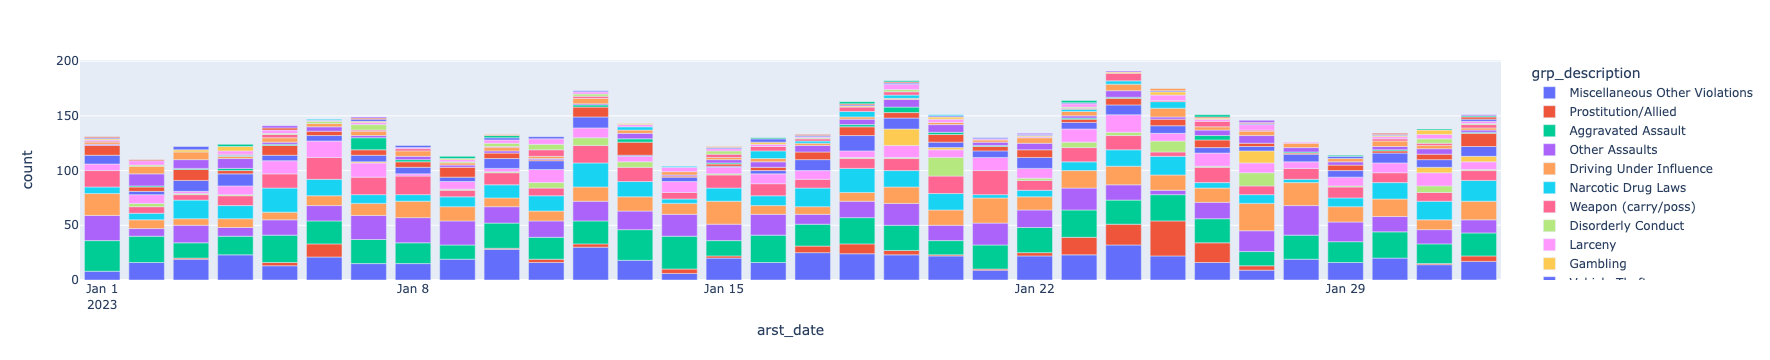

In [36]:
# make a stacked bar chart
fig = px.bar(arrests_grouped,
       x='arst_date',
       y='count',
       color='grp_description' # this creates the "stack"
)

fig.show()

Now it's your turn!

* Add a title
* Clean up the labels (arst_date, grp_description, etc)

## Data cleanup: subsetting your data

Let's go back to the original dataset.

In [37]:
arrests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4782 entries, 0 to 4781
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   rpt_id           4782 non-null   object
 1   report_type      4782 non-null   object
 2   arst_date        4782 non-null   object
 3   time             4781 non-null   object
 4   area             4782 non-null   object
 5   area_desc        4782 non-null   object
 6   rd               4782 non-null   object
 7   age              4782 non-null   object
 8   sex_cd           4782 non-null   object
 9   descent_cd       4782 non-null   object
 10  chrg_grp_cd      4479 non-null   object
 11  grp_description  4479 non-null   object
 12  arst_typ_cd      4782 non-null   object
 13  charge           4782 non-null   object
 14  chrg_desc        4479 non-null   object
 15  dispo_desc       4405 non-null   object
 16  location         4782 non-null   object
 17  crsst            1888 non-null   

That's a lot of fields. Let's create a subset of the data with just the following fields:

- `arst_date`
- `age`
- `descent_cd`
- `grp_description`
- `lat`
- `lon`

In list format:
```
['arst_date','age','descent_cd','grp_description','lat','lon']
```

In [42]:
# subset the data below (don't forget to add .copy at the end)
arrests_mini = arrests[['arst_date','age','descent_cd','grp_description','lat','lon']].copy()

In [43]:
# get info for our subset data
arrests_mini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4782 entries, 0 to 4781
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   arst_date        4782 non-null   object
 1   age              4782 non-null   object
 2   descent_cd       4782 non-null   object
 3   grp_description  4479 non-null   object
 4   lat              4782 non-null   object
 5   lon              4782 non-null   object
dtypes: object(6)
memory usage: 224.3+ KB


Our `lat` and `lon` columns need to be of data type float. Let's convert them.

In [44]:
# convert lat/lon's to floats
arrests_mini['lat'] = arrests_mini['lat'].astype(float)
arrests_mini['lon'] = arrests_mini['lon'].astype(float)
arrests_mini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4782 entries, 0 to 4781
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   arst_date        4782 non-null   object 
 1   age              4782 non-null   object 
 2   descent_cd       4782 non-null   object 
 3   grp_description  4479 non-null   object 
 4   lat              4782 non-null   float64
 5   lon              4782 non-null   float64
dtypes: float64(2), object(4)
memory usage: 224.3+ KB


What happens if we create a scatter plot, placing `lon` in the x-axis `lat` in the y-axis?

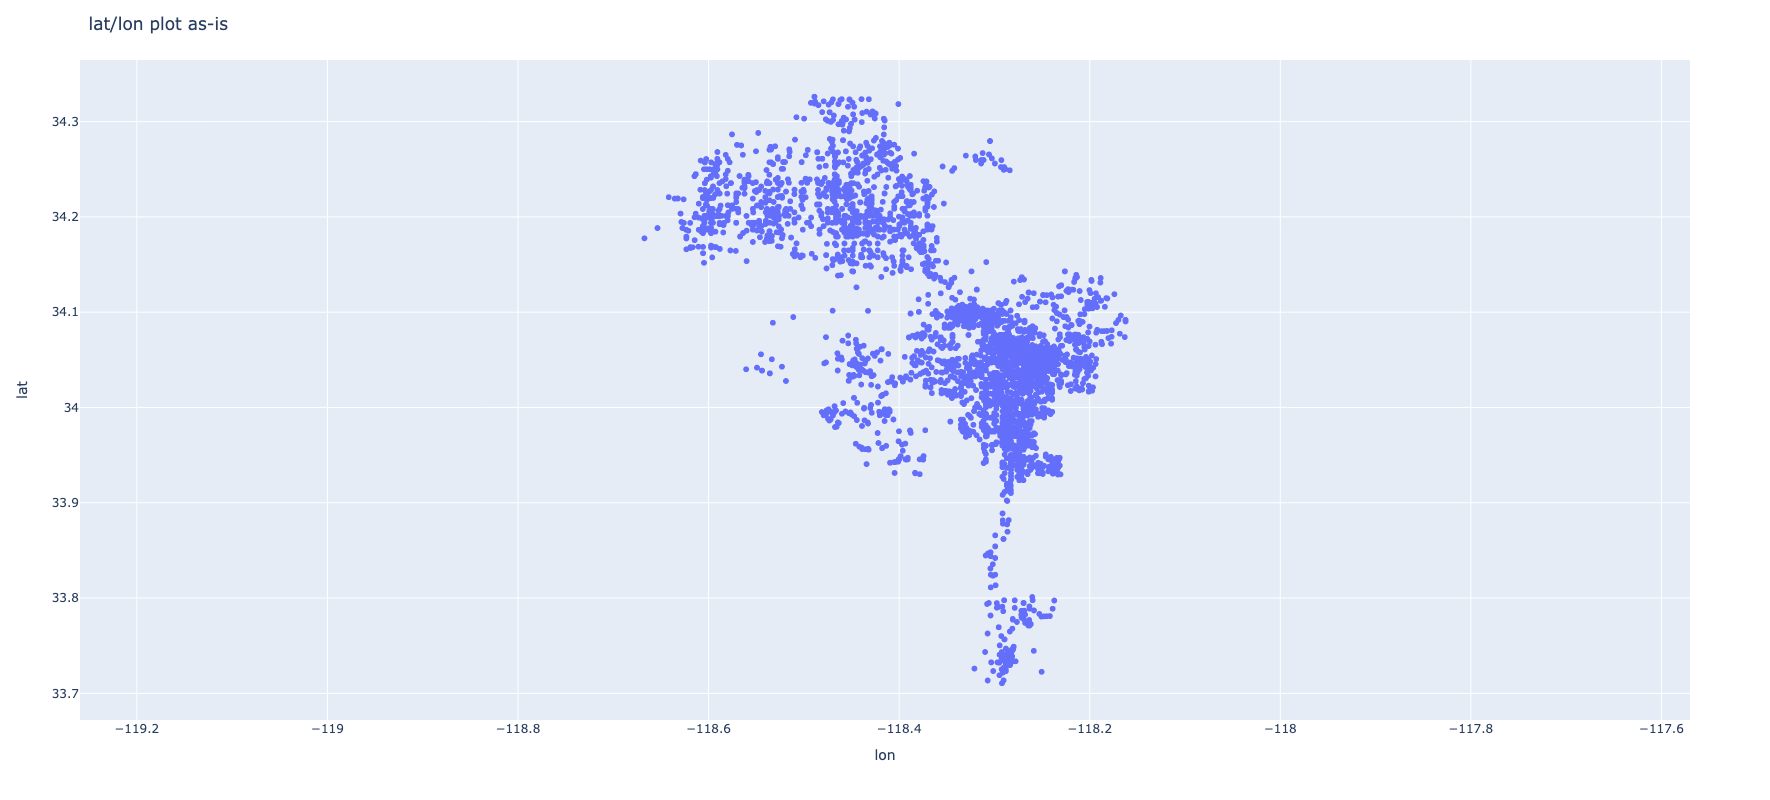

In [45]:
# plot it
fig = px.scatter(arrests_mini,
           x='lon',
           y='lat'
)

# options on the layout
fig.update_layout(
    width = 800,
    height = 800,
    title = "lat/lon plot as-is"
)

# make it a square grid
fig.update_yaxes(
    scaleanchor = "x",
    scaleratio = 1,
)

fig.show()

## Plotly maps
Plotly has support for a mapbox slippy map. 

- https://plotly.com/python/scattermapbox/

Have fun with this, and change the `mapbox_style` attribute to any of the following:

* `open-street-map`
* `white-bg`
* `carto-positron`
* `carto-darkmatter`
* `stamen-terrain`
* `stamen-toner`
* `stamen-watercolor`


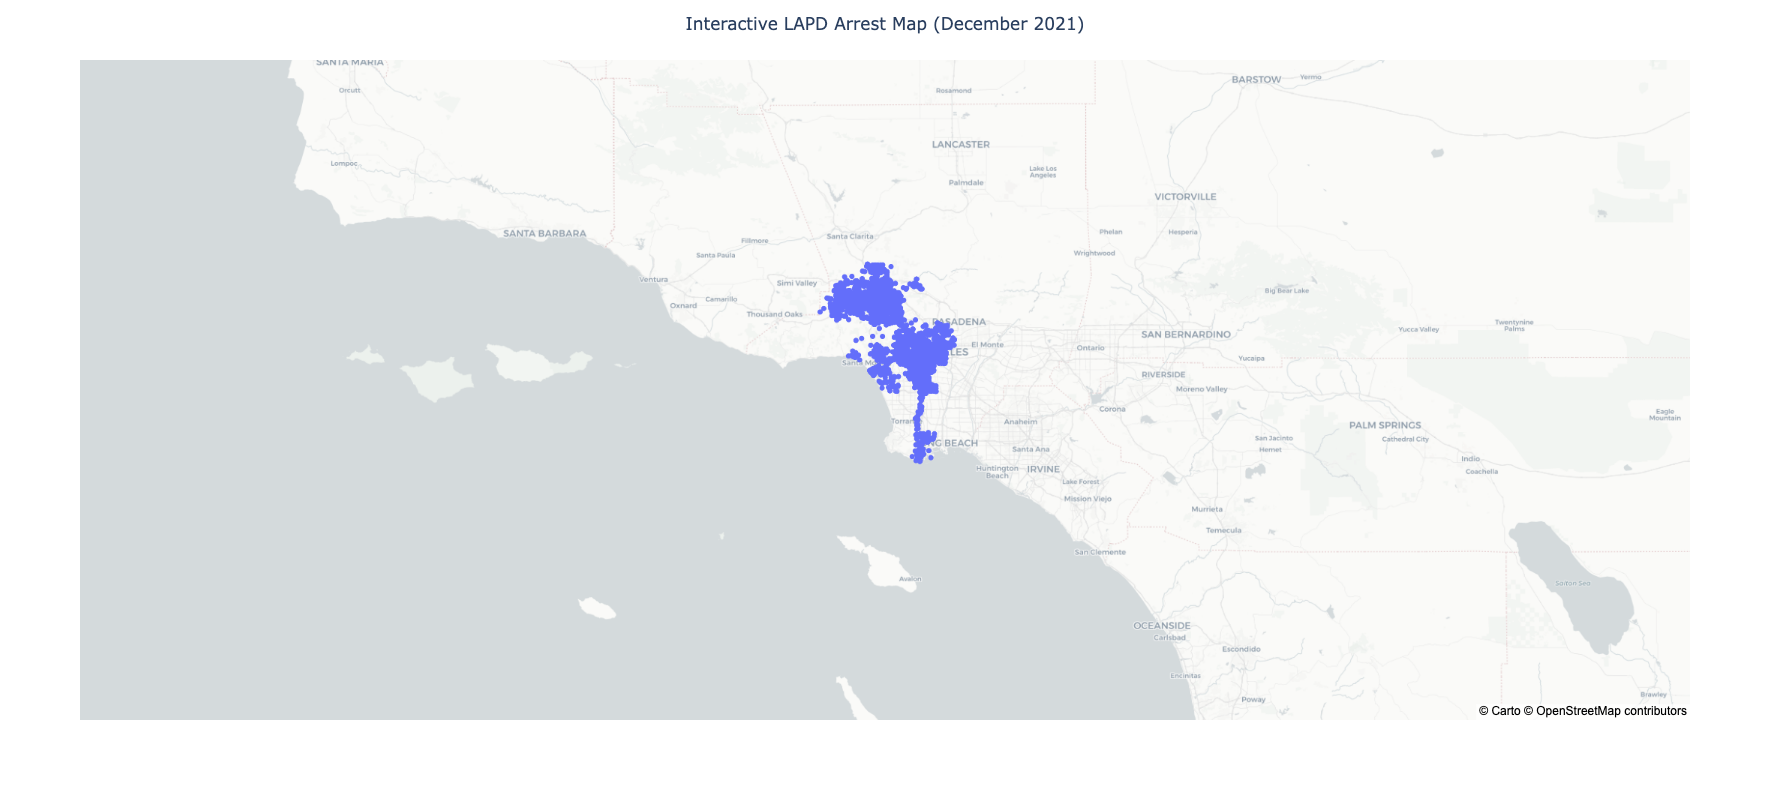

In [46]:
fig = px.scatter_mapbox(arrests_mini,
                        lat='lat',
                        lon='lon',
                        mapbox_style="carto-positron")

# options on the layout
fig.update_layout(
    width = 800,
    height = 800,
    title = "Interactive LAPD Arrest Map (December 2021)",
    title_x=0.5 # aligns title to center
)

fig.show()

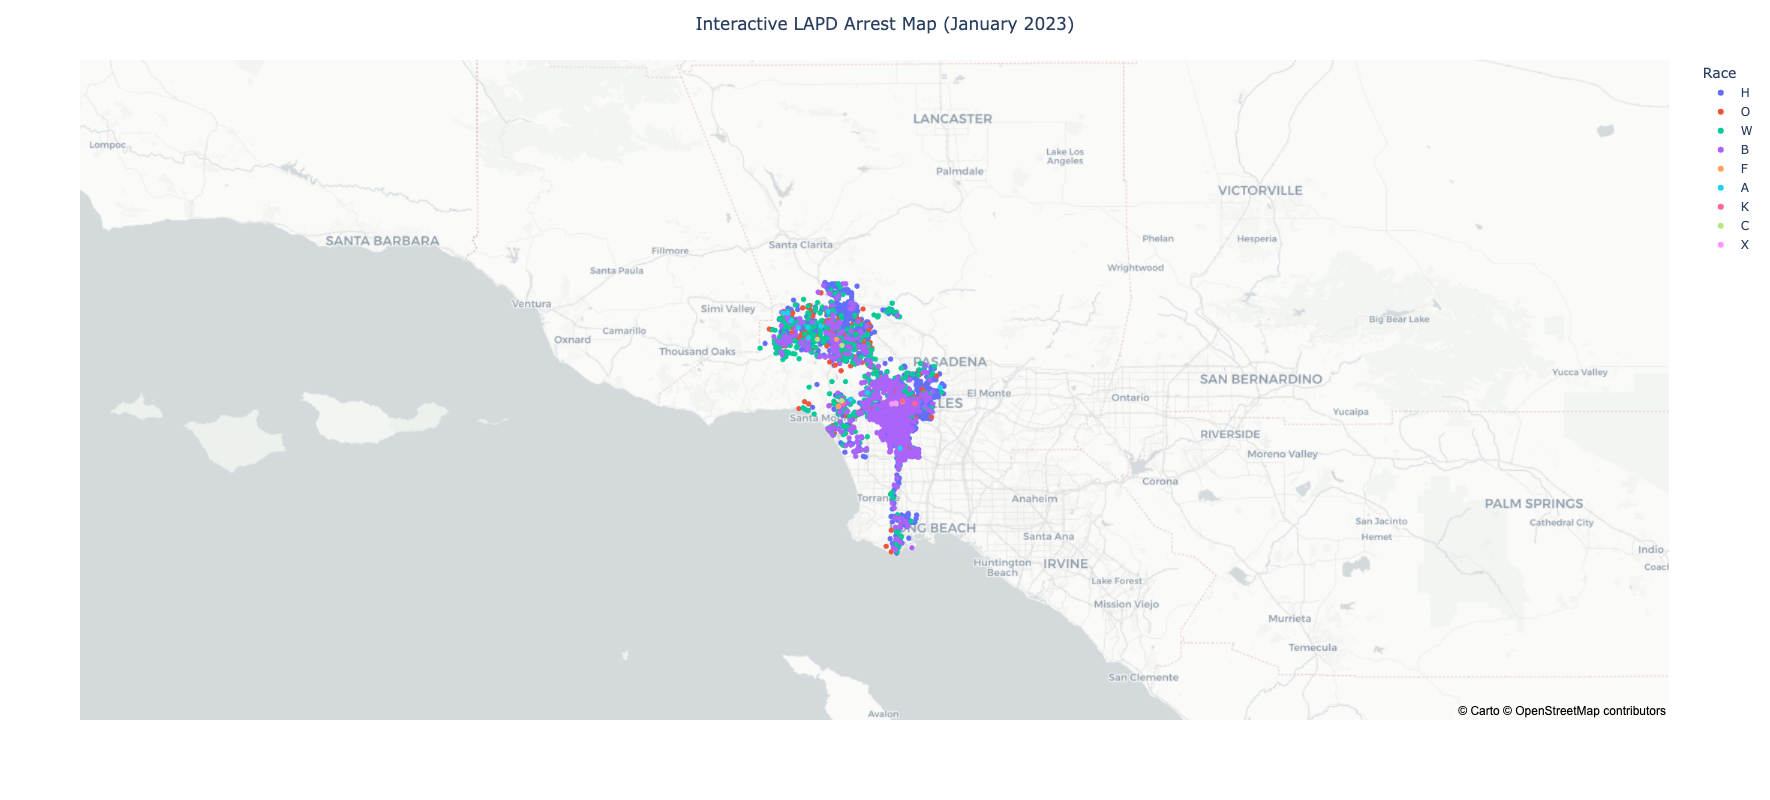

In [47]:
# before you run this cell, what do you think it will produce?
fig = px.scatter_mapbox(arrests_mini, 
                        lat="lat", 
                        lon="lon", 
                        color="descent_cd",
                        labels={'descent_cd':'Race'},
                        mapbox_style="carto-positron"
                       )

# options on the layout
fig.update_layout(
    width = 800,
    height = 800,
    title = "Interactive LAPD Arrest Map (January 2023)",
    title_x=0.5 # aligns title to center
)


fig.show()

Look at the function below, and see if you can figure out what it is meant to do:

In [48]:
def race_map(race='H'):
    
    fig = px.scatter_mapbox(
                            arrests_mini[arrests_mini.descent_cd==race], 
                            lat="lat", 
                            lon="lon", 
                            color="descent_cd",
                            labels={'descent_cd':'Race'},
                            mapbox_style="carto-positron"
    )

    # options on the layout
    fig.update_layout(
        width = 600,
        height = 600,
        title = "Interactive LAPD Arrest Map (January 2023)<br>Showing where descent label is "+race,
        title_x=0.5 # aligns title to center
    )

    fig.show()

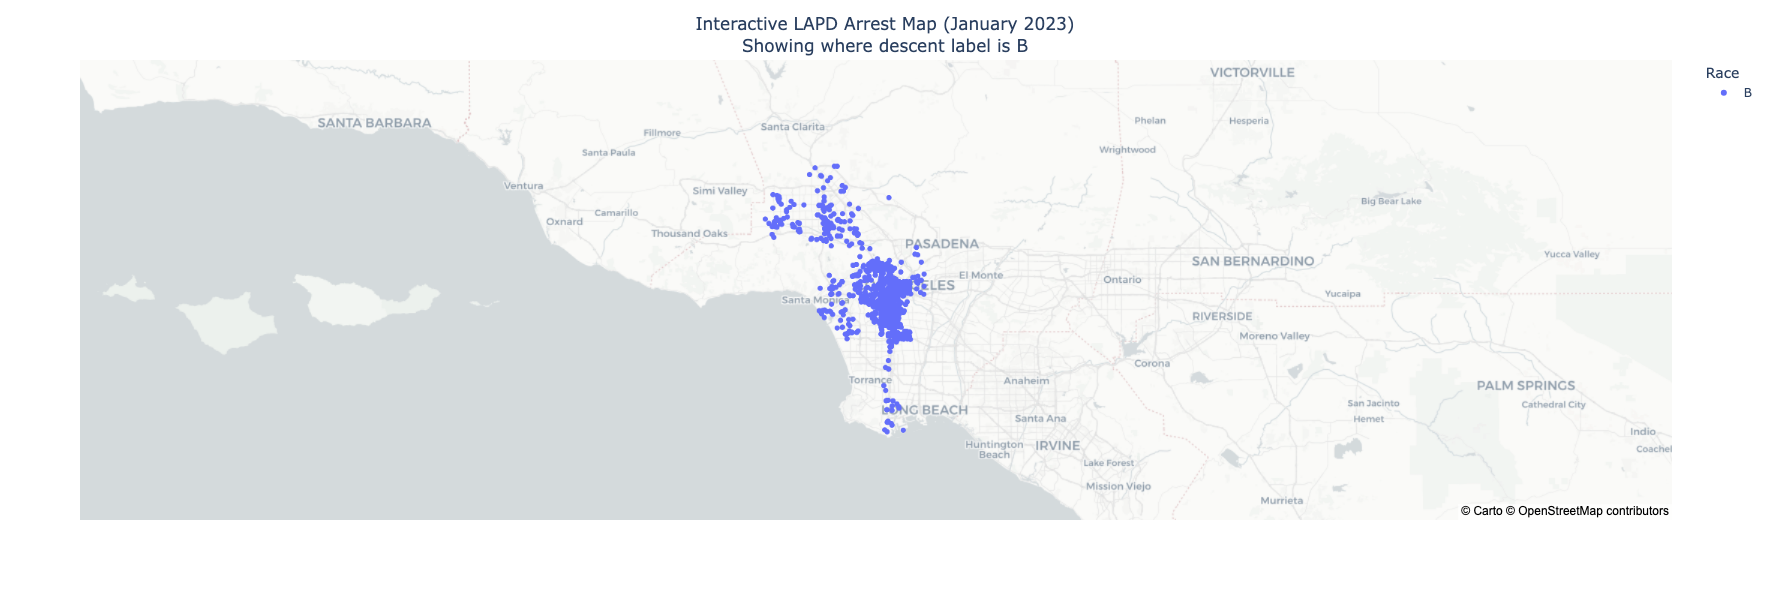

In [49]:
# call the function (try other values)
race_map(race='B')

## Using a loop

In [ ]:
# get a list of distinct race values
race_list = arrests_mini.descent_cd.unique().tolist()
race_list

In [ ]:
# loop and map!
for race in race_list:
    race_map(race)

# Summarize by neighborhoods

Bring in neighborhoods directly from source:

- https://geohub.lacity.org/datasets/lahub::la-times-neighborhood-boundaries/about

In [ ]:
neighborhoods = gpd.read_file("https://services5.arcgis.com/7nsPwEMP38bSkCjy/arcgis/rest/services/LA_Times_Neighborhoods/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson")

In [ ]:
neighborhoods.plot(figsize=(12,12))

In [ ]:
# convert arrests_mini to geodataframe
gdf = gpd.GeoDataFrame(
    arrests_mini, geometry=gpd.points_from_xy(arrests_mini.lon, arrests_mini.lat),crs=4326)

# check that it can be mapped
gdf.plot()

In [ ]:
# conduct a spatial join (i.e. assign each arrest to the neighborhood it is in)
arrest_by_neighborhood = gpd.sjoin(neighborhoods, gdf) #Spatial join Points to polygons
arrest_by_neighborhood

In [ ]:
# count the number of records per community
arrest_counts = arrest_by_neighborhood.value_counts('name').reset_index(name='arrest_count')
arrest_counts

In [ ]:
# add the count to the neighborhoods
neighborhoods = neighborhoods.merge(arrest_counts, how='left', on='name')

In [ ]:
neighborhoods.sample(10)

In [ ]:
# choropleth map of arrests by neighborhoods
fig,ax = plt.subplots(figsize=(12,12))

neighborhoods.plot(ax=ax,column='arrest_count',legend=True,cmap='Reds')


<div class="alert alert-info">
Now it's your turn!

* Make the final map output "prettier"
* Find a socrata based open dataset
* Use the sodapy library and import it
* Conduct data exploration and analysis
* Create two or more plots using the plotly express library
* Create map visualization using plotly and/or the KeplerGL libraries
</div>
